In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [179]:
df=pd.read_csv('/home/rgukt/Downloads/archive (4)/car_price_dataset.csv')

In [180]:
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [181]:
for i in df:
    print(df[i].isnull().sum()/len(df))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [183]:
arr=list(df.describe().columns)

In [184]:
arr
    

['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price']

In [185]:
numerical_df=df[arr]
numerical_df

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
0,2020,4.2,289944,3,5,8501
1,2012,2.0,5356,2,3,12092
2,2020,4.2,231440,4,2,11171
3,2023,2.0,160971,2,1,11780
4,2003,2.6,286618,3,3,2867
...,...,...,...,...,...,...
9995,2004,3.7,5794,2,4,8884
9996,2002,1.4,168000,2,1,6240
9997,2010,3.0,86664,5,1,9866
9998,2002,1.4,225772,4,1,4084


In [186]:
def fun(column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    q2=df[column].median()
    iqr=q3-q1
    min=q1-iqr*1.5
    maxi=q3+iqr*1.5
    return [min,maxi]

In [187]:
df['Price'][df['Price']>17747] & df['Price'][df['Price']<-14.75]

1012    False
1100    False
5698    False
7221    False
8422    False
9564    False
Name: Price, dtype: bool

In [188]:
df = df[~((df['Price'] > 17747) | (df['Price'] < -14.75))]

In [189]:
df['Price'][df['Price']>17747] & df['Price'][df['Price']<-14.75]

Series([], Name: Price, dtype: int64)

In [190]:
df.corr()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
Year,1.000000,-0.002507,-0.001126,0.014123,-0.000306,0.662664
Engine_Size,-0.002507,1.000000,0.016499,-0.010652,0.006621,0.356057
Mileage,-0.001126,0.016499,1.000000,0.008758,0.006739,-0.550270
Doors,0.014123,-0.010652,0.008758,1.000000,-0.005691,-0.001102
Owner_Count,-0.000306,0.006621,0.006739,-0.005691,1.000000,0.001812
Price,0.662664,0.356057,-0.550270,-0.001102,0.001812,1.000000


In [191]:
for i in numerical_df:
    print(fun(i))

[1989.5, 2033.5]
[-1.0, 7.0]
[-148541.625, 446929.375]
[1.5, 5.5]
[-1.0, 7.0]
[-10.25, 17735.75]


In [192]:
def outlier(column,mini,maxi):
    print(column ,df[column][df[column]>maxi] & df[column][df[column]<mini])

In [193]:
for i in numerical_df:
    min_max_data=fun(i)
    outlier(i,min_max_data[0],min_max_data[1])

Year Series([], Name: Year, dtype: int64)
Engine_Size Series([], Name: Engine_Size, dtype: bool)
Mileage Series([], Name: Mileage, dtype: int64)
Doors Series([], Name: Doors, dtype: int64)
Owner_Count Series([], Name: Owner_Count, dtype: int64)
Price Series([], Name: Price, dtype: int64)


/home/rgukt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Engine_Size', ylabel='Density'>

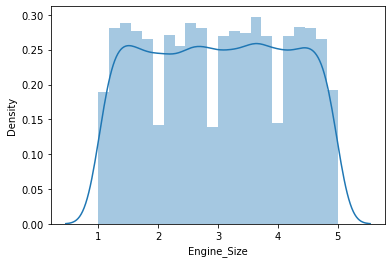

In [194]:
sns.distplot(df['Engine_Size'])


/home/rgukt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

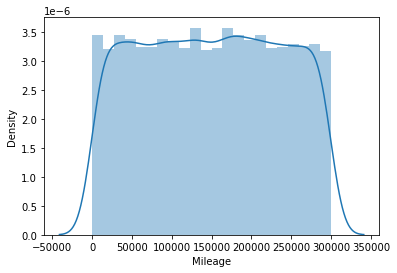

In [195]:
sns.distplot(df['Mileage'])


/home/rgukt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Doors', ylabel='Density'>

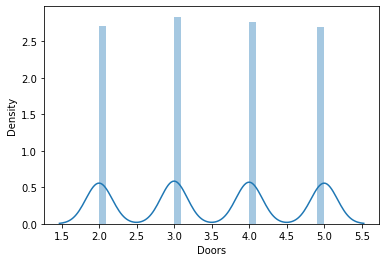

In [196]:
sns.distplot(df['Doors'])

In [197]:
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [198]:
pd.get_dummies(df['Model']).corr()

,3 Series,5 Series,A3,A4,Accord,C-Class,CR-V,Camry,Civic,Corolla,...,Optima,Passat,Q5,RAV4,Rio,Sonata,Sportage,Tiguan,Tucson,X5
3 Series,1.000000,-0.035635,-0.034790,-0.035478,-0.036207,-0.033098,-0.033154,-0.033926,-0.034736,-0.034089,...,-0.034736,-0.034360,-0.035478,-0.034089,-0.034252,-0.033816,-0.033486,-0.035583,-0.034360,-0.033376
5 Series,-0.035635,1.000000,-0.035745,-0.036453,-0.037202,-0.034007,-0.034064,-0.034858,-0.035690,-0.035026,...,-0.035690,-0.035304,-0.036453,-0.035026,-0.035193,-0.034745,-0.034406,-0.036561,-0.035304,-0.034293
A3,-0.034790,-0.035745,1.000000,-0.035588,-0.036319,-0.033200,-0.033256,-0.034030,-0.034843,-0.034194,...,-0.034843,-0.034466,-0.035588,-0.034194,-0.034358,-0.033921,-0.033590,-0.035693,-0.034466,-0.033479
A4,-0.035478,-0.036453,-0.035588,1.000000,-0.037038,-0.033857,-0.033914,-0.034704,-0.035533,-0.034871,...,-0.035533,-0.035148,-0.036292,-0.034871,-0.035038,-0.034592,-0.034254,-0.036399,-0.035148,-0.034141
Accord,-0.036207,-0.037202,-0.036319,-0.037038,1.000000,-0.034553,-0.034611,-0.035417,-0.036263,-0.035587,...,-0.036263,-0.035870,-0.037038,-0.035587,-0.035757,-0.035303,-0.034958,-0.037147,-0.035870,-0.034843
C-Class,-0.033098,-0.034007,-0.033200,-0.033857,-0.034553,1.000000,-0.031639,-0.032375,-0.033149,-0.032531,...,-0.033149,-0.032790,-0.033857,-0.032531,-0.032687,-0.032271,-0.031956,-0.033957,-0.032790,-0.031851
CR-V,-0.033154,-0.034064,-0.033256,-0.033914,-0.034611,-0.031639,1.000000,-0.032430,-0.033205,-0.032586,...,-0.033205,-0.032845,-0.033914,-0.032586,-0.032742,-0.032325,-0.032010,-0.034014,-0.032845,-0.031904
Camry,-0.033926,-0.034858,-0.034030,-0.034704,-0.035417,-0.032375,-0.032430,1.000000,-0.033978,-0.033345,...,-0.033978,-0.033610,-0.034704,-0.033345,-0.033504,-0.033078,-0.032755,-0.034806,-0.033610,-0.032647
Civic,-0.034736,-0.035690,-0.034843,-0.035533,-0.036263,-0.033149,-0.033205,-0.033978,1.000000,-0.034142,...,-0.034790,-0.034413,-0.035533,-0.034142,-0.034305,-0.033868,-0.033538,-0.035638,-0.034413,-0.033427
Corolla,-0.034089,-0.035026,-0.034194,-0.034871,-0.035587,-0.032531,-0.032586,-0.033345,-0.034142,1.000000,...,-0.034142,-0.033772,-0.034871,-0.033506,-0.033666,-0.033238,-0.032913,-0.034974,-0.033772,-0.032805


In [199]:
label_encoder=LabelEncoder()

In [200]:
df['Model']=label_encoder.fit_transform(df['Model'])

/tmp/ipykernel_161840/899845726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model']=label_encoder.fit_transform(df['Model'])


In [201]:
df['Model']

0       24
1       19
2       16
3       22
4       17
        ..
9995    20
9996    18
9997     0
9998    13
9999    27
Name: Model, Length: 9994, dtype: int64

In [202]:
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,24,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,19,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,16,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,22,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,17,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,20,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,18,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,0,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,13,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [203]:
df['Fuel_Type']=label_encoder.fit_transform(df['Fuel_Type'])

/tmp/ipykernel_161840/2987873879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fuel_Type']=label_encoder.fit_transform(df['Fuel_Type'])


In [204]:
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,24,2020,4.2,0,Manual,289944,3,5,8501
1,Chevrolet,19,2012,2.0,2,Automatic,5356,2,3,12092
2,Mercedes,16,2020,4.2,0,Automatic,231440,4,2,11171
3,Audi,22,2023,2.0,1,Manual,160971,2,1,11780
4,Volkswagen,17,2003,2.6,2,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,20,2004,3.7,0,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,18,2002,1.4,1,Automatic,168000,2,1,6240
9997,BMW,0,2010,3.0,3,Automatic,86664,5,1,9866
9998,Ford,13,2002,1.4,2,Automatic,225772,4,1,4084


In [205]:
df['Brand']=label_encoder.fit_transform(df['Brand'])

/tmp/ipykernel_161840/3136046454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Brand']=label_encoder.fit_transform(df['Brand'])


In [206]:
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,6,24,2020,4.2,0,Manual,289944,3,5,8501
1,2,19,2012,2.0,2,Automatic,5356,2,3,12092
2,7,16,2020,4.2,0,Automatic,231440,4,2,11171
3,0,22,2023,2.0,1,Manual,160971,2,1,11780
4,9,17,2003,2.6,2,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,6,20,2004,3.7,0,Semi-Automatic,5794,2,4,8884
9996,2,18,2002,1.4,1,Automatic,168000,2,1,6240
9997,1,0,2010,3.0,3,Automatic,86664,5,1,9866
9998,3,13,2002,1.4,2,Automatic,225772,4,1,4084


In [207]:
len(list(df['Transmission'].unique()))

3

In [208]:
pd.get_dummies(df['Transmission']).corr()

,Automatic,Manual,Semi-Automatic
Automatic,1.000000,-0.502277,-0.495436
Manual,-0.502277,1.000000,-0.502277
Semi-Automatic,-0.495436,-0.502277,1.000000


In [209]:
df = pd.get_dummies(df, columns=['Transmission'])

In [210]:
price=df['Price']
df.drop('Price', axis=1, inplace=True)


In [211]:
df
df['Price']=price

In [212]:
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Mileage,Doors,Owner_Count,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic,Price
0,6,24,2020,4.2,0,289944,3,5,0,1,0,8501
1,2,19,2012,2.0,2,5356,2,3,1,0,0,12092
2,7,16,2020,4.2,0,231440,4,2,1,0,0,11171
3,0,22,2023,2.0,1,160971,2,1,0,1,0,11780
4,9,17,2003,2.6,2,286618,3,3,0,0,1,2867
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6,20,2004,3.7,0,5794,2,4,0,0,1,8884
9996,2,18,2002,1.4,1,168000,2,1,1,0,0,6240
9997,1,0,2010,3.0,3,86664,5,1,1,0,0,9866
9998,3,13,2002,1.4,2,225772,4,1,1,0,0,4084


In [213]:
X=df.iloc[:, :-1]

In [214]:
X

,Brand,Model,Year,Engine_Size,Fuel_Type,Mileage,Doors,Owner_Count,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic
0,6,24,2020,4.2,0,289944,3,5,0,1,0
1,2,19,2012,2.0,2,5356,2,3,1,0,0
2,7,16,2020,4.2,0,231440,4,2,1,0,0
3,0,22,2023,2.0,1,160971,2,1,0,1,0
4,9,17,2003,2.6,2,286618,3,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,6,20,2004,3.7,0,5794,2,4,0,0,1
9996,2,18,2002,1.4,1,168000,2,1,1,0,0
9997,1,0,2010,3.0,3,86664,5,1,1,0,0
9998,3,13,2002,1.4,2,225772,4,1,1,0,0


In [215]:
Y=df['Price']

In [216]:
Y

0        8501
1       12092
2       11171
3       11780
4        2867
        ...  
9995     8884
9996     6240
9997     9866
9998     4084
9999     3342
Name: Price, Length: 9994, dtype: int64

In [217]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [218]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [219]:
lr=LinearRegression()

In [220]:
lr.fit(X_train,Y_train)

LinearRegression()

In [221]:
Y_predict=lr.predict(X_test)

In [222]:
mean_squared_error(Y_test,Y_predict)

695010.2291145573

In [223]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, Y_predict)
print("R² Score:", r2)

R² Score: 0.9261735706782733


In [224]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(Y_test, Y_predict)
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_predict)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


MAE: 761.6978489244623
MSE: 695010.2291145573
RMSE: 833.6727350192983
R² Score: 0.9261735706782733
